# QUESTION FINDING: Average Scores of Baseline Survey

This displays the mean for every column on the first survey, the baseline survey. There is a change in the question 24 to be changed into 3 columns containing "breakfast", "lunch", and "dinner". 1 means the patient does have meal during that time and 0 means the patient does not. Question 31 was changed to military time.

NOTE: This code can write the dataframe to a csv file if you uncomment the last line.

In [352]:
library("dplyr")

survey1 <- read.csv("survey1.csv", header = TRUE, )

survey1_deleted <- survey1[-c(1:26)]

survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
  ), format="%H")

survey1_deleted <- survey1_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))


survey1_deleted <- survey1_deleted[, !(names(survey1_deleted) %in% 
                                         c("X24_Which_meals_eat_everyday"))]

survey1_deleted <- survey1_deleted %>%
  select(dinner, everything())
survey1_deleted <- survey1_deleted %>%
  select(lunch, everything())
survey1_deleted <- survey1_deleted %>%
  select(breakfast, everything())


column_types1 <- sapply(survey1_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}

survey1_deleted <- rbind(survey1_deleted, colMeans = colMeans(survey1_deleted, na.rm = TRUE))

#numeric_means <- colMeans(final, na.rm = TRUE)
#final_with_means <- rbind(final, colMeans = numeric_means)

final <- cbind(ID = rownames(survey1_deleted), survey1_deleted)
rownames(final) <- 1:nrow(final)
summary(final)

#write.csv(final, file='survey1-means.csv', row.names=FALSE)


       ID        breakfast          lunch           dinner      
 1      :  1   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 10     :  1   1st Qu.:0.1858   1st Qu.:1.000   1st Qu.:0.0000  
 100    :  1   Median :1.0000   Median :1.000   Median :1.0000  
 101    :  1   Mean   :0.7431   Mean   :0.844   Mean   :0.7248  
 102    :  1   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 103    :  1   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
 (Other):104                                                    
 X23_Servings_alcohol X25_Which_largest_meal
 Min.   :1.000        Min.   :1.000         
 1st Qu.:1.000        1st Qu.:1.000         
 Median :1.000        Median :2.000         
 Mean   :1.422        Mean   :2.055         
 3rd Qu.:1.000        3rd Qu.:3.000         
 Max.   :8.000        Max.   :3.000         
                                            
 X26_Over_last_two_weeks_how_many_times_snack_per_day
 Min.   : 0.000                                      
 1st Qu.: 1.

# QUESTION FINDING: Average Scores of End of Session Survey

This displays the mean for every column on the second survey, the end of session survey. There is a change in the question 24 to be changed into 3 columns containing "breakfast", "lunch", and "dinner". 1 means the patient does have meal during that time and 0 means the patient does not. Question 31 was changed to military time.

NOTE: This code can write the dataframe to a csv file if you uncomment the last line.

In [212]:
library("dplyr")

survey2 <- read.csv("survey2.csv", header = TRUE, )

survey1_deleted <- survey2[-c(1:26)]

survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
  ), format="%H")


survey1_deleted <- survey1_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))


survey1_deleted <- survey1_deleted[, !(names(survey1_deleted) %in% 
                                         c("X24_Which_meals_eat_everyday"))]

survey1_deleted <- survey1_deleted %>%
  select(dinner, everything())
survey1_deleted <- survey1_deleted %>%
  select(lunch, everything())
survey1_deleted <- survey1_deleted %>%
  select(breakfast, everything())


column_types1 <- sapply(survey1_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}

survey1_deleted <- rbind(survey1_deleted, colMeans = colMeans(survey1_deleted, na.rm = TRUE))

#numeric_means <- colMeans(final, na.rm = TRUE)
#final_with_means <- rbind(final, colMeans = numeric_means)

final <- cbind(ID = rownames(survey1_deleted), survey1_deleted)
rownames(final) <- 1:nrow(final)
summary(final)

#write.csv(final, file='survey2-means.csv', row.names=FALSE)

       ID        breakfast      lunch            dinner      
 1      :  1   Min.   :1    Min.   :0.0000   Min.   :0.0000  
 10     :  1   1st Qu.:1    1st Qu.:1.0000   1st Qu.:0.0000  
 100    :  1   Median :1    Median :1.0000   Median :0.0000  
 101    :  1   Mean   :1    Mean   :0.9778   Mean   :0.2667  
 102    :  1   3rd Qu.:1    3rd Qu.:1.0000   3rd Qu.:1.0000  
 103    :  1   Max.   :1    Max.   :1.0000   Max.   :1.0000  
 (Other):104   NA's   :19   NA's   :19       NA's   :19      
 X22_Servings_unsweetened_beverages X23_Servings_alcohol X25_Which_largest_meal
 Min.   : 1.000                     Min.   :1.000        Min.   :1.000         
 1st Qu.: 2.000                     1st Qu.:2.000        1st Qu.:1.000         
 Median : 9.000                     Median :2.000        Median :1.000         
 Mean   : 7.266                     Mean   :1.844        Mean   :1.178         
 3rd Qu.:11.000                     3rd Qu.:2.000        3rd Qu.:1.000         
 Max.   :17.000         

# QUESTION FINDING: Average Scores of the Follow-Up Survey

This displays the mean for every column on the third survey, the follow-up survey. There is a change in the question 24 to be changed into 3 columns containing "breakfast", "lunch", and "dinner". 1 means the patient does have meal during that time and 0 means the patient does not. Question 31 was changed to military time.

NOTE: This code can write the dataframe to a csv file if you uncomment the last line.

In [213]:
library("dplyr")

survey3 <- read.csv("survey3.csv", header = TRUE, )

survey1_deleted <- survey3[-c(1:26)]

survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
  ), format="%H")


survey1_deleted <- survey1_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))


survey1_deleted <- survey1_deleted[, !(names(survey1_deleted) %in% 
                                         c("X24_Which_meals_eat_everyday"))]

survey1_deleted <- survey1_deleted %>%
  select(dinner, everything())
survey1_deleted <- survey1_deleted %>%
  select(lunch, everything())
survey1_deleted <- survey1_deleted %>%
  select(breakfast, everything())


column_types1 <- sapply(survey1_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}

survey1_deleted <- rbind(survey1_deleted, colMeans = colMeans(survey1_deleted, na.rm = TRUE))

#numeric_means <- colMeans(final, na.rm = TRUE)
#final_with_means <- rbind(final, colMeans = numeric_means)

final <- cbind(ID = rownames(survey1_deleted), survey1_deleted)
rownames(final) <- 1:nrow(final)
summary(final)

#write.csv(final, file='survey3-means.csv', row.names=FALSE)

       ID        breakfast       lunch         dinner     
 1      :  1   Min.   :0.0   Min.   :0.0   Min.   :0.000  
 10     :  1   1st Qu.:1.0   1st Qu.:1.0   1st Qu.:0.000  
 100    :  1   Median :1.0   Median :1.0   Median :0.000  
 101    :  1   Mean   :0.9   Mean   :0.9   Mean   :0.375  
 102    :  1   3rd Qu.:1.0   3rd Qu.:1.0   3rd Qu.:1.000  
 103    :  1   Max.   :1.0   Max.   :1.0   Max.   :1.000  
 (Other):111   NA's   :76    NA's   :76    NA's   :76     
 X22_Servings_unsweetened_beverages X23_Servings_alcohol X25_Which_largest_meal
 Min.   : 1.000                     Min.   :1.000        Min.   :1.00          
 1st Qu.: 1.000                     1st Qu.:1.000        1st Qu.:1.00          
 Median : 1.000                     Median :1.000        Median :2.00          
 Mean   : 3.879                     Mean   :1.353        Mean   :1.65          
 3rd Qu.: 6.000                     3rd Qu.:2.000        3rd Qu.:2.00          
 Max.   :17.000                     Max.   :3.00

# QUESTION FINDING: Changes in the Scores from Baseline to End of Session

This subtracts the baseline survey from the end of session survey. This displays the mean for every column and you can see if there was a negative or positive change from being apart of the program. There is a change in the question 24 to be changed into 3 columns containing "breakfast", "lunch", and "dinner". 1 means the patient does have meal during that time and 0 means the patient does not. Question 31 was changed to military time.

NOTE: This code can write the dataframe to a csv file if you uncomment the last line.

In [214]:
library("dplyr")

survey1 <- read.csv("survey1.csv", header = TRUE, )
survey2 <- read.csv("survey2.csv", header = TRUE, )

survey1_deleted <- survey1[-c(1:26)]
survey2_deleted <- survey2[-c(1:27)]

survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
    ), format="%H")
survey2_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey2_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
    ), format="%H")


survey1_deleted <- survey1_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))


survey1_deleted <- survey1_deleted[, !(names(survey1_deleted) %in% 
                                       c("X24_Which_meals_eat_everyday"))]
survey2_deleted <- survey2_deleted[, !(names(survey2_deleted) %in% 
                                         c("X24_Which_meals_eat_everyday"))]

survey1_deleted <- survey1_deleted %>%
  select(dinner, everything())
survey1_deleted <- survey1_deleted %>%
  select(lunch, everything())
survey1_deleted <- survey1_deleted %>%
  select(breakfast, everything())

survey2_deleted <- survey2_deleted %>%
  select(dinner, everything())
survey2_deleted <- survey2_deleted %>%
  select(lunch, everything())
survey2_deleted <- survey2_deleted %>%
  select(breakfast, everything())


column_types1 <- sapply(survey1_deleted, class)
column_types2 <- sapply(survey2_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])
non_numeric_columns2 <- names(column_types2[column_types2 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}
for (col in non_numeric_columns1) {
  survey2_deleted[[col]] <- as.numeric(survey2_deleted[[col]])
}

matching_row_names1 <- rownames(survey1_deleted) %in% rownames(survey2_deleted)
only_matching1 <- survey1_deleted[matching_row_names1, ]
matching_row_names2 <- rownames(survey2_deleted) %in% rownames(survey1_deleted)
only_matching2 <- survey2_deleted[matching_row_names2, ]

final <- only_matching2 - only_matching1

final <- rbind(final, colMeans = colMeans(final, na.rm = TRUE))

#numeric_means <- colMeans(final, na.rm = TRUE)
#final_with_means <- rbind(final, colMeans = numeric_means)

final <- cbind(ID = rownames(final), final)
rownames(final) <- 1:nrow(final)

for (col_name in colnames(final)) {
  cat(paste(col_name, ": ", final[nrow(final), col_name], "\n"))
}

#write.csv(final, file='surveys1-and-2-differences.csv', row.names=FALSE)

ID :  110 
breakfast :  0.2 
lunch :  0.133333333333333 
dinner :  -0.422222222222222 
X23_Servings_alcohol :  0.422018348623853 
X25_Which_largest_meal :  -0.833333333333333 
X26_Over_last_two_weeks_how_many_times_snack_per_day :  -2.5 
X27_Over_last_two_weeks_how_many_8oz_water_drink_per_day :  0.743119266055046 
X28A_How_many_days_per_week_engage_exercise :  3.27522935779817 
X28B_How_many_minutes_engage_exercise :  1.34862385321101 
X29_Past_month_how_many_minutes_spend_outside_daily :  0.588888888888889 
X30_Over_last_two_weeks_how_many_hours_slept :  0.697247706422018 
X31_Over_last_two_weeks_when_gone_to_bed :  2.95505617977528 
X32_Use_cigarettes_e.cigarettes_marijuana_cigars_chew_snuff :  -0.0444444444444444 
X33_How_many_cigarettes_smoke_daily :  -1.05555555555556 
X34_How_often_attent_church_or_religious_meetings :  0.577777777777778 
X35_How_often_spend_private_time_religious_activities :  0.288888888888889 
X36_I_experience_the_God_presence :  0.110091743119266 
X37_My_rel

# QUESTION FINDING: Changes in the Scores from Baseline to Follow-Up Session

This subtracts the baseline survey from the end of follow-up session survey. This displays the mean for every column and you can see if there was a negative or positive change from before, to long after the program. There is a change in the question 24 to be changed into 3 columns containing "breakfast", "lunch", and "dinner". 1 means the patient does have meal during that time and 0 means the patient does not. Question 31 was changed to military time.

NOTE: This code can write the dataframe to a csv file if you uncomment the last line.

In [216]:
library("dplyr")

survey1 <- read.csv("survey1.csv", header = TRUE, )
survey2 <- read.csv("survey3.csv", header = TRUE, )

survey1_deleted <- survey1[-c(1:26)]
survey2_deleted <- survey2[-c(1:27)]

survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
    ), format="%H")
survey2_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey2_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
    ), format="%H")


survey1_deleted <- survey1_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))


survey1_deleted <- survey1_deleted[, !(names(survey1_deleted) %in% 
                                       c("X24_Which_meals_eat_everyday"))]
survey2_deleted <- survey2_deleted[, !(names(survey2_deleted) %in% 
                                         c("X24_Which_meals_eat_everyday"))]

survey1_deleted <- survey1_deleted %>%
  select(dinner, everything())
survey1_deleted <- survey1_deleted %>%
  select(lunch, everything())
survey1_deleted <- survey1_deleted %>%
  select(breakfast, everything())

survey2_deleted <- survey2_deleted %>%
  select(dinner, everything())
survey2_deleted <- survey2_deleted %>%
  select(lunch, everything())
survey2_deleted <- survey2_deleted %>%
  select(breakfast, everything())


column_types1 <- sapply(survey1_deleted, class)
column_types2 <- sapply(survey2_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])
non_numeric_columns2 <- names(column_types2[column_types2 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}
for (col in non_numeric_columns1) {
  survey2_deleted[[col]] <- as.numeric(survey2_deleted[[col]])
}

matching_row_names1 <- rownames(survey1_deleted) %in% rownames(survey2_deleted)
only_matching1 <- survey1_deleted[matching_row_names1, ]
matching_row_names2 <- rownames(survey2_deleted) %in% rownames(survey1_deleted)
only_matching2 <- survey2_deleted[matching_row_names2, ]

final <- only_matching2 - only_matching1

final <- rbind(final, colMeans = colMeans(final, na.rm = TRUE))

#numeric_means <- colMeans(final, na.rm = TRUE)
#final_with_means <- rbind(final, colMeans = numeric_means)

final <- cbind(ID = rownames(final), final)
rownames(final) <- 1:nrow(final)

for (col_name in colnames(final)) {
  cat(paste(col_name, ": ", final[nrow(final), col_name], "\n"))
}

#write.csv(final, file='surveys1-and-3-differences.csv', row.names=FALSE)

ID :  110 
breakfast :  0.153846153846154 
lunch :  0.0512820512820513 
dinner :  -0.307692307692308 
X23_Servings_alcohol :  -0.055045871559633 
X25_Which_largest_meal :  -0.461538461538462 
X26_Over_last_two_weeks_how_many_times_snack_per_day :  -0.717948717948718 
X27_Over_last_two_weeks_how_many_8oz_water_drink_per_day :  0.512820512820513 
X28A_How_many_days_per_week_engage_exercise :  1.51282051282051 
X28B_How_many_minutes_engage_exercise :  30.8684210526316 
X29_Past_month_how_many_minutes_spend_outside_daily :  -1.96330275229358 
X30_Over_last_two_weeks_how_many_hours_slept :  0.128205128205128 
X31_Over_last_two_weeks_when_gone_to_bed :  1.43589743589744 
X32_Use_cigarettes_e.cigarettes_marijuana_cigars_chew_snuff :  0 
X33_How_many_cigarettes_smoke_daily :  -1.02564102564103 
X34_How_often_attent_church_or_religious_meetings :  0.41025641025641 
X35_How_often_spend_private_time_religious_activities :  0.102564102564103 
X36_I_experience_the_God_presence :  0.0256410256410256

# FINDING 1: Program's spiritual impact not correlated with happiness

Program's spiritual impact not correlated with happiness. The first finding was comparing the first and second survey. I subtracted the second survey from the first survey to find significant differences between patients after the program from before the program. This compared the differences in:

1. pep
2. energy
3. happiness
4. whether they carry religion into their life
5. whether religion guides them
6. experiencing God's presence.

I wanted to use other comparisons like church attendance or depression but the variance was much lower.

The surveys seem to indicate that patients who leave feeling God's presence more, using religion to guide their life and in their everyday life, do not have a significant, correlated change in energy, pep, or happiness as a consequence of their change in spirituality. In conclusion, the program, if it does make a spiritual impact, does not make an impact on the person's happiness or energy.

In [328]:
library(VIM)
library("dplyr")
         
survey1 <- read.csv("survey1.csv", header = TRUE, )
survey2 <- read.csv("survey2.csv", header = TRUE, )
         
# I did this in RStudio so I had to made the dataset similar to what I did in RStudio
# for the code to work. Here I change the name of the first column since it had a
# special character before.
colnames(survey1)[1] <- 'ID'
colnames(survey2)[1] <- 'ID'

# This assigns the row indexes to be the ID.
rownames(survey1) <- survey1$ID
rownames(survey2) <- survey2$ID
         
# This removes the ID column since we don't need it anymore.
survey1 <- survey1[-c(1)]
survey2 <- survey2[-c(1)]
         
# This selects the columns we need for the evaluation.
survey1_deleted <- survey1[c(40, 41, 42, 69, 73, 76)]
survey2_deleted <- survey2[c(41, 42, 43, 70, 74, 77)]

# The next couple lines transfer any character values to numeric by looping through
# each column.
column_types1 <- sapply(survey1_deleted, class)
column_types2 <- sapply(survey2_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])
non_numeric_columns2 <- names(column_types2[column_types2 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}
for (col in non_numeric_columns1) {
  survey2_deleted[[col]] <- as.numeric(survey2_deleted[[col]])
}

# This removes any rows with null values and makes sure the column names are unique.
clean_base_1 <- survey1_deleted[complete.cases(survey1_deleted), , drop = FALSE]
clean_base_2 <- survey2_deleted[complete.cases(survey2_deleted), , drop = FALSE]
names(clean_base_1) <- make.unique(names(clean_base_1))
names(clean_base_2) <- make.unique(names(clean_base_2))

clean_base_1 <- clean_base_1 %>% 
  rename("36_God_Presence" = "X36_I_experience_the_God_presence",
         "37_religion_guide" = "X37_My_religious_beliefs.guide_my_approach_to_life",
         "38_carry_religion_into_all_dealings" = "X38_I_try_to_carry_my_religion_into_all_dealings_in_life",
         "65_pep" = "X65_Did_you_feel_full_of_pep",
         "69_energy" = "X69_Did_you_have_a_lot_of_energy",
         "72_happy_person" = "X72_Have_you_been_happy_person")

clean_base_2 <- clean_base_2 %>% 
  rename("36_God_Presence" = "X36_I_experience_the_God_presence",
         "37_religion_guide" = "X37_My_religious_beliefs.guide_my_approach_to_life",
         "38_carry_religion_into_all_dealings" = "X38_I_try_to_carry_my_religion_into_all_dealings_in_life",
         "65_pep" = "X65_Did_you_feel_full_of_pep",
         "69_energy" = "X69_Did_you_have_a_lot_of_energy",
         "72_happy_person" = "X72_Have_you_been_happy_person")

## Baseline Survey

[1] "First survey:"


 36_God_Presence 37_religion_guide 38_carry_religion_into_all_dealings
 Min.   :1.000   Min.   :1.000     Min.   :1.000                      
 1st Qu.:5.000   1st Qu.:4.000     1st Qu.:4.000                      
 Median :5.000   Median :5.000     Median :5.000                      
 Mean   :4.743   Mean   :4.615     Mean   :4.385                      
 3rd Qu.:5.000   3rd Qu.:5.000     3rd Qu.:5.000                      
 Max.   :5.000   Max.   :5.000     Max.   :5.000                      
     65_pep        69_energy     72_happy_person
 Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:3.000   1st Qu.:2.000  
 Median :4.000   Median :4.000   Median :2.000  
 Mean   :3.826   Mean   :3.835   Mean   :2.908  
 3rd Qu.:5.000   3rd Qu.:5.000   3rd Qu.:4.000  
 Max.   :7.000   Max.   :7.000   Max.   :6.000  

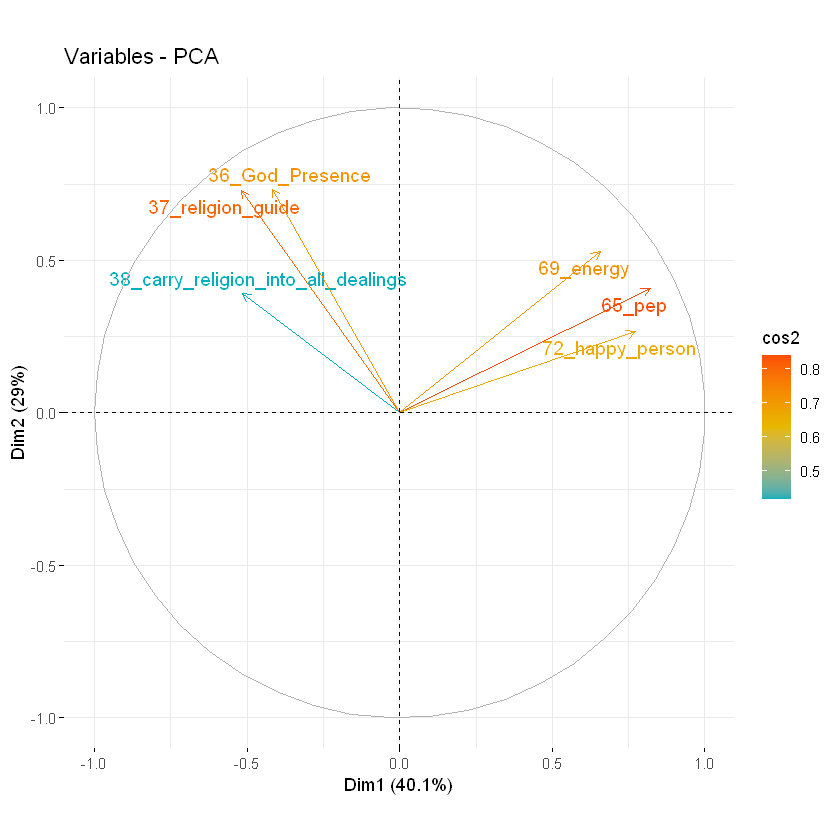

In [329]:
library(factoextra)

print("First survey:")
summary(clean_base_1)


res.pca <- prcomp(clean_base_1, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

## End of Session Survey

[1] "Second survey:"


 36_God_Presence 37_religion_guide 38_carry_religion_into_all_dealings
 Min.   :2.000   Min.   :1.000     Min.   :1.000                      
 1st Qu.:6.000   1st Qu.:5.000     1st Qu.:4.000                      
 Median :6.000   Median :5.000     Median :5.000                      
 Mean   :5.667   Mean   :4.689     Mean   :4.433                      
 3rd Qu.:6.000   3rd Qu.:5.000     3rd Qu.:5.000                      
 Max.   :7.000   Max.   :5.000     Max.   :5.000                      
     65_pep        69_energy     72_happy_person
 Min.   :2.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:3.000   1st Qu.:2.000   1st Qu.:1.000  
 Median :3.000   Median :2.500   Median :2.000  
 Mean   :3.833   Mean   :2.856   Mean   :2.144  
 3rd Qu.:4.750   3rd Qu.:4.000   3rd Qu.:2.000  
 Max.   :8.000   Max.   :6.000   Max.   :6.000  

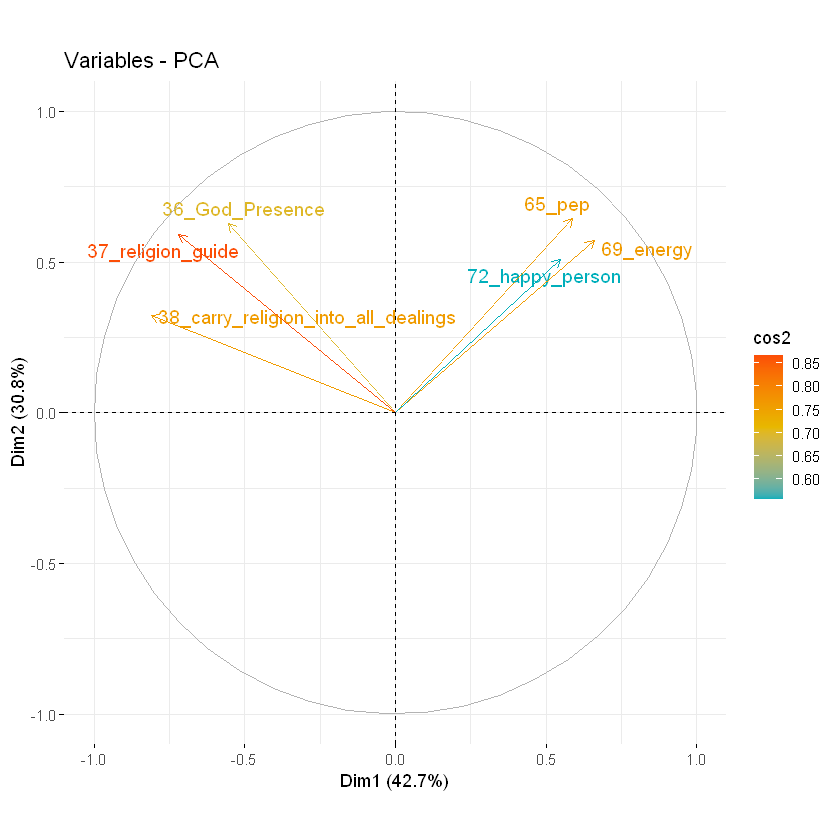

In [330]:
print("Second survey:")
summary(clean_base_2)

res.pca <- prcomp(clean_base_2, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

## Difference of Baseline Survey from End of Session Survey.

In [331]:
# Finds which rows are in both datasets.
matching_row_names1 <- rownames(clean_base_1) %in% rownames(clean_base_2)
only_matching1 <- clean_base_1[matching_row_names1, ]
matching_row_names2 <- rownames(clean_base_2) %in% rownames(clean_base_1)
only_matching2 <- clean_base_2[matching_row_names2, ]

# Gets the difference of the second survey and the first survey and stores it in
# final.
final <- only_matching2 - only_matching1

[1] "Difference of first survey from second survey:"


 36_God_Presence   37_religion_guide  38_carry_religion_into_all_dealings
 Min.   :-3.0000   Min.   :-4.00000   Min.   :-4.00000                   
 1st Qu.: 1.0000   1st Qu.: 0.00000   1st Qu.: 0.00000                   
 Median : 1.0000   Median : 0.00000   Median : 0.00000                   
 Mean   : 0.9222   Mean   : 0.03333   Mean   :-0.03333                   
 3rd Qu.: 1.0000   3rd Qu.: 0.00000   3rd Qu.: 0.00000                   
 Max.   : 5.0000   Max.   : 3.00000   Max.   : 4.00000                   
     65_pep          69_energy       72_happy_person
 Min.   :-4.0000   Min.   :-5.0000   Min.   :-5.0   
 1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:-1.0   
 Median : 0.0000   Median :-1.0000   Median : 0.0   
 Mean   : 0.1111   Mean   :-0.8889   Mean   :-0.6   
 3rd Qu.: 1.0000   3rd Qu.: 0.0000   3rd Qu.: 0.0   
 Max.   : 5.0000   Max.   : 4.0000   Max.   : 4.0   

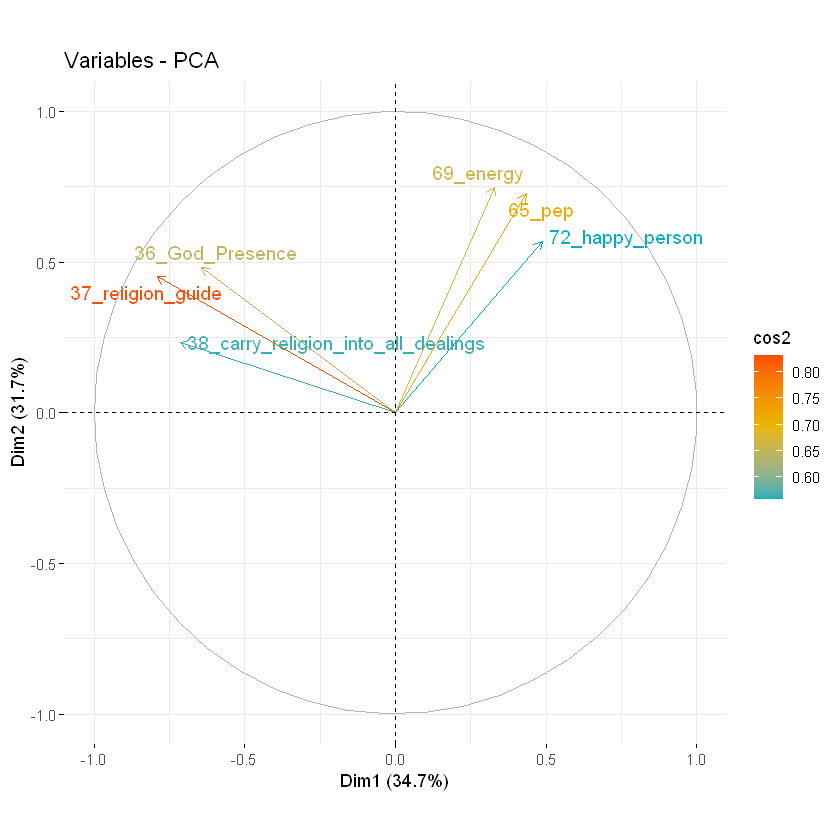

In [332]:
print("Difference of first survey from second survey:")
summary(final)

# PCA evaluation
res.pca <- prcomp(final, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

# FINDING 2: Changes in meat eating not correlated with changes in religious guidance

The second finding was also comparing the first and second survey. I subtracted the second survey from the first survey to find
significant differences between patients after the program from before the program. The attributes compared are:
1. poultry per day
2. red meat per day
3. whether they carry religion into their life.
4. Religious beliefs guide my approach to life

The findings show that patients who had changes over the program on how they treat spirituality, had no connection to their meat-eating habits.

In [343]:
library(VIM)
library("dplyr")


survey1 <- read.csv("survey1.csv", header = TRUE, )
survey2 <- read.csv("survey2.csv", header = TRUE, )
         
# I did this in RStudio so I had to made the dataset similar to what I did in RStudio
# for the code to work. Here I change the name of the first column since it had a
# special character before.
colnames(survey1)[1] <- 'ID'
colnames(survey2)[1] <- 'ID'

# This assigns the row indexes to be the ID.
rownames(survey1) <- survey1$ID
rownames(survey2) <- survey2$ID

# This removes the ID column since we don't need it anymore.
survey1 <- survey1[-c(1)]
survey2 <- survey2[-c(1)]

# Converts to military time.
survey1$X31_Over_last_two_weeks_when_gone_to_bed <- 
    format(strptime(survey1$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"), format="%H")
survey2$X31_Over_last_two_weeks_when_gone_to_bed <- 
    format(strptime(survey2$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"), format="%H")

# This selects the columns we need for the evaluation.
survey1_deleted <- survey1[c(41, 42, 96, 97)]
survey2_deleted <- survey2[c(42, 43, 97, 98)]

# The next couple lines transfer any character values to numeric by looping through
# each column.
column_types1 <- sapply(survey1_deleted, class)
column_types2 <- sapply(survey2_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])
non_numeric_columns2 <- names(column_types2[column_types2 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}
for (col in non_numeric_columns1) {
  survey2_deleted[[col]] <- as.numeric(survey2_deleted[[col]])
}

# This removes any rows with null values and makes sure the column names are unique.
clean_base_1 <- survey1_deleted[complete.cases(survey1_deleted), , drop = FALSE]
clean_base_2 <- survey2_deleted[complete.cases(survey2_deleted), , drop = FALSE]
names(clean_base_1) <- make.unique(names(clean_base_1))
names(clean_base_2) <- make.unique(names(clean_base_2))

clean_base_1 <- clean_base_1 %>% 
  rename("37_Religious_Beliefs_Guide_Me" = "X37_My_religious_beliefs.guide_my_approach_to_life",
         "38_Carry_Religion_Into_Life" = "X38_I_try_to_carry_my_religion_into_all_dealings_in_life",
         "11_Red_Meat_Per_Day" = "X11_perday_red_meat",
         "12_Poultry_Per_Day" = "X12_perday_poultry"
         )

clean_base_2 <- clean_base_2 %>% 
  rename("37_Religious_Beliefs_Guide_Me" = "X37_My_religious_beliefs.guide_my_approach_to_life",
         "38_Carry_Religion_Into_Life" = "X38_I_try_to_carry_my_religion_into_all_dealings_in_life",
         "11_Red_Meat_Per_Day" = "X11_perday_red_meat",
         "12_Poultry_Per_Day" = "X12_perday_poultry"
         )

## Baseline Survey

 37_Religious_Beliefs_Guide_Me 38_Carry_Religion_Into_Life 11_Red_Meat_Per_Day
 Min.   :1.000                 Min.   :1.000               Min.   :0.0000     
 1st Qu.:4.000                 1st Qu.:4.000               1st Qu.:0.0000     
 Median :5.000                 Median :5.000               Median :0.0000     
 Mean   :4.615                 Mean   :4.385               Mean   :0.1734     
 3rd Qu.:5.000                 3rd Qu.:5.000               3rd Qu.:0.1000     
 Max.   :5.000                 Max.   :5.000               Max.   :2.0000     
 12_Poultry_Per_Day
 Min.   :0.0000    
 1st Qu.:0.0000    
 Median :0.0000    
 Mean   :0.2497    
 3rd Qu.:0.2857    
 Max.   :2.0000    

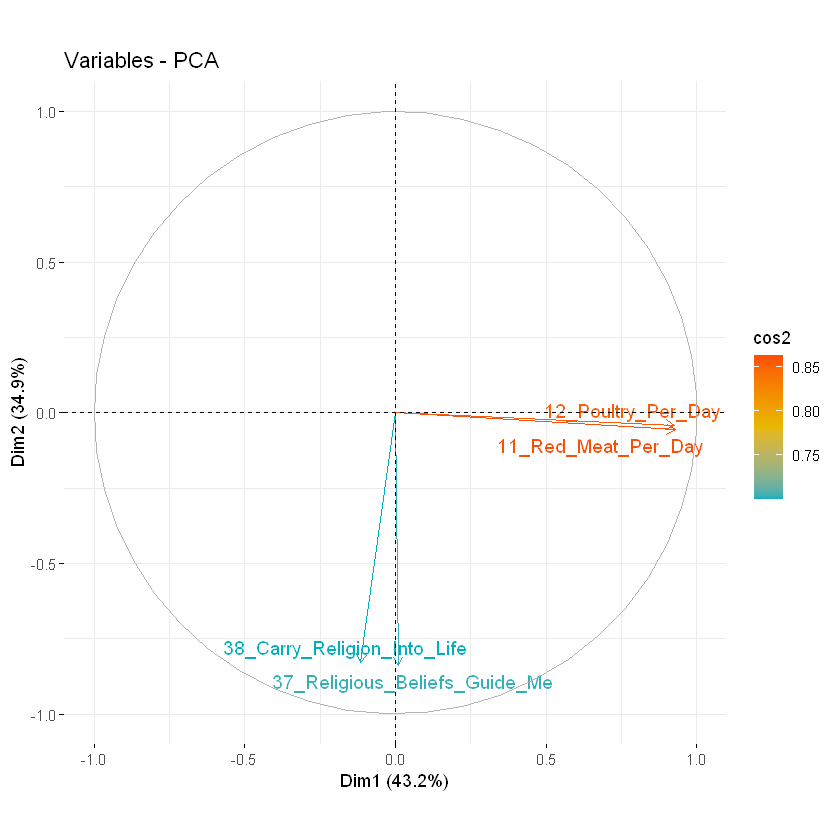

In [344]:
library(factoextra)

summary(clean_base_1)


res.pca <- prcomp(clean_base_1, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

## End of Session Survey

[1] "Second survey:"


 37_Religious_Beliefs_Guide_Me 38_Carry_Religion_Into_Life 11_Red_Meat_Per_Day
 Min.   :1.000                 Min.   :1.000               Min.   :0.0000000  
 1st Qu.:5.000                 1st Qu.:4.000               1st Qu.:0.0000000  
 Median :5.000                 Median :5.000               Median :0.0000000  
 Mean   :4.689                 Mean   :4.433               Mean   :0.0003704  
 3rd Qu.:5.000                 3rd Qu.:5.000               3rd Qu.:0.0000000  
 Max.   :5.000                 Max.   :5.000               Max.   :0.0333333  
 12_Poultry_Per_Day
 Min.   :0.00000   
 1st Qu.:0.00000   
 Median :0.00000   
 Mean   :0.00746   
 3rd Qu.:0.00000   
 Max.   :0.57143   

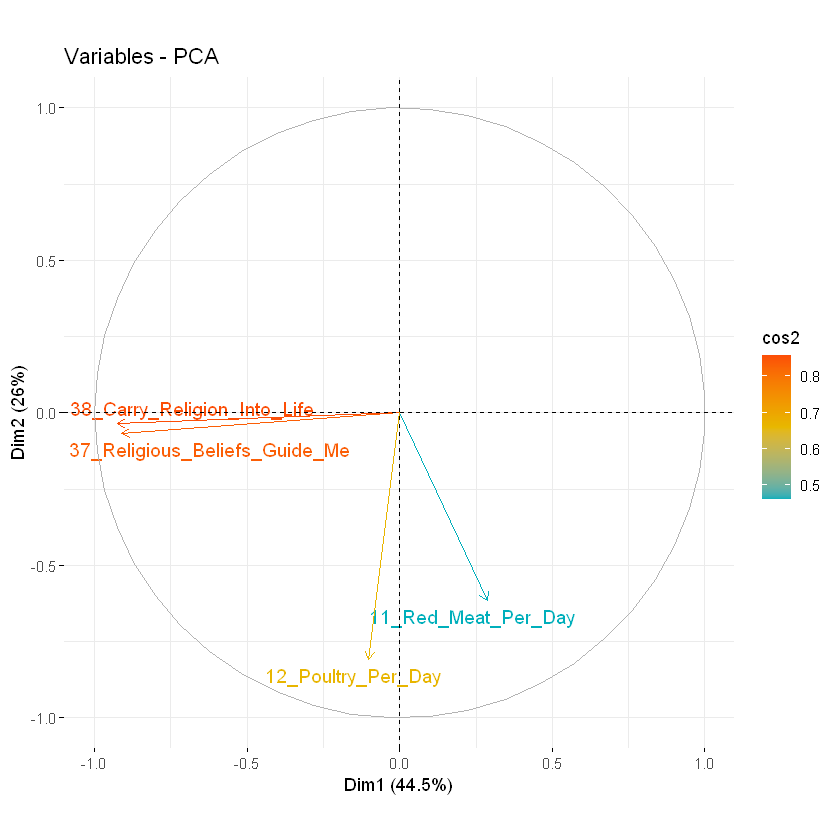

In [345]:
print("Second survey:")
summary(clean_base_2)

res.pca <- prcomp(clean_base_2, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

## Difference of Baseline Survey from End of Session Survey.

In [346]:
# Finds which rows are in both datasets.
matching_row_names1 <- rownames(clean_base_1) %in% rownames(clean_base_2)
only_matching1 <- clean_base_1[matching_row_names1, ]
matching_row_names2 <- rownames(clean_base_2) %in% rownames(clean_base_1)
only_matching2 <- clean_base_2[matching_row_names2, ]

# Gets the difference of the second survey and the first survey and stores it in
# final.
final <- only_matching2 - only_matching1

 37_Religious_Beliefs_Guide_Me 38_Carry_Religion_Into_Life 11_Red_Meat_Per_Day
 Min.   :-4.00000              Min.   :-4.00000            Min.   :-2.00000   
 1st Qu.: 0.00000              1st Qu.: 0.00000            1st Qu.:-0.06667   
 Median : 0.00000              Median : 0.00000            Median : 0.00000   
 Mean   : 0.03333              Mean   :-0.03333            Mean   :-0.11524   
 3rd Qu.: 0.00000              3rd Qu.: 0.00000            3rd Qu.: 0.00000   
 Max.   : 3.00000              Max.   : 4.00000            Max.   : 0.00000   
 12_Poultry_Per_Day
 Min.   :-2.0000   
 1st Qu.:-0.1429   
 Median : 0.0000   
 Mean   :-0.1792   
 3rd Qu.: 0.0000   
 Max.   : 0.0000   

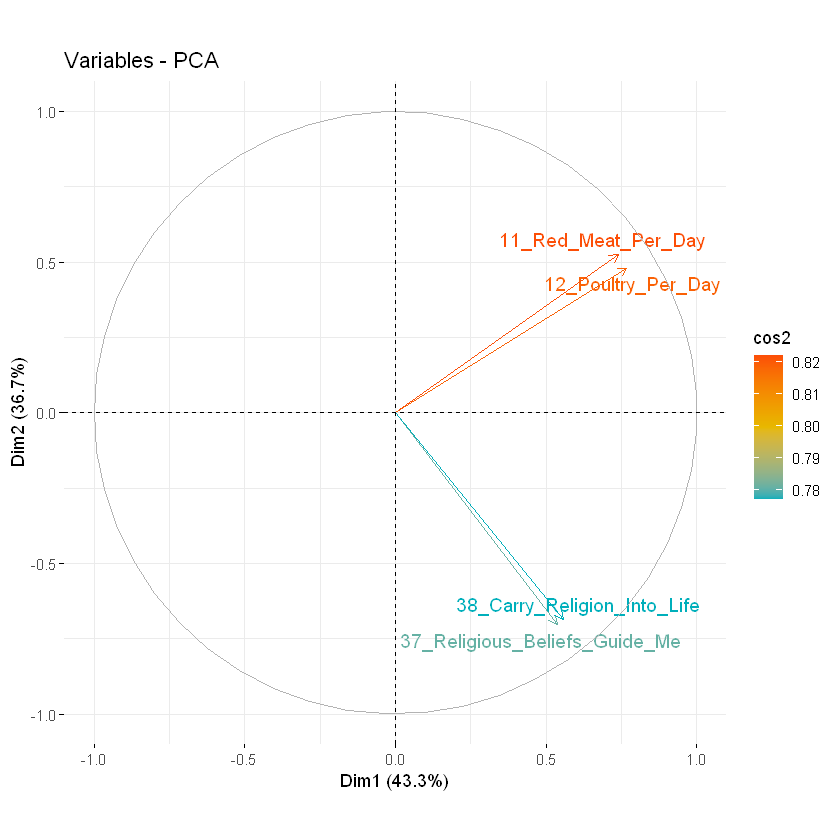

In [347]:
summary(final)

# PCA evaluation
library(factoextra)
res.pca <- prcomp(final, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

# FINDING 3: Changes in BMI is correlated more with changes in diet than changes in walking habits.

The last finding was also comparing the differences between the second and first survey. This time I compared it to the 
differences in the vitals. I subtracted the second survey from the first survey to find significant differences between patients
after the program from before the program. Then I compared these differences to the vital signs, specifically the subtraction of
BMI1 from BMI2. This compared:
1. diet, 
2. BMI
3. how much walking was done.

The findings show that for patients, there was more of a correlation between changes in BMI and diet choices. Patients change in frequency of going to fast food places and frequency of eating red meat and desserts impacted BMI the most. Changes in BMI
was not correlated with changes in walking habits. Remember though, this is only for the time between the program. It shows that the most sudden changes in BMI, that can be made in the program's length, is by improving diet.

In [348]:
library(VIM)
library("dplyr")

survey1 <- read.csv("survey1.csv", header = TRUE, )
survey2 <- read.csv("survey2.csv", header = TRUE, )
         
# I did this in RStudio so I had to made the dataset similar to what I did in RStudio
# for the code to work. Here I change the name of the first column since it had a
# special character before.
colnames(survey1)[1] <- 'ID'
colnames(survey2)[1] <- 'ID'

# This assigns the row indexes to be the ID.
rownames(survey1) <- survey1$ID
rownames(survey2) <- survey2$ID
      
# This removes the ID column since we don't need it anymore.
survey1 <- survey1[-c(1)]
survey2 <- survey2[-c(1)]

# This selects the columns we need for the evaluation.
survey1_deleted <- survey1[c(31, 56, 55, 104, 96)]
survey2_deleted <- survey2[c(32, 57, 56, 105, 97)]

# The next couple lines transfer any character values to numeric by looping through
# each column.
column_types1 <- sapply(survey1_deleted, class)
column_types2 <- sapply(survey2_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])
non_numeric_columns2 <- names(column_types2[column_types2 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}
for (col in non_numeric_columns1) {
  survey2_deleted[[col]] <- as.numeric(survey2_deleted[[col]])
}

# This removes any rows with null values and makes sure the column names are unique.
clean_base_1 <- survey1_deleted[complete.cases(survey1_deleted), , drop = FALSE]
clean_base_2 <- survey2_deleted[complete.cases(survey2_deleted), , drop = FALSE]
names(clean_base_1) <- make.unique(names(clean_base_1))
names(clean_base_2) <- make.unique(names(clean_base_2))

clean_base_1 <- clean_base_1 %>% 
  rename("28A_days_per_week_exercising" = "X28A_How_many_days_per_week_engage_exercise",
    "52_Walking_several_blocks" = "X52_Walking_several_blocks",
    "51_Walking_more_than_a_mile" = "X51_Walking_more_than_a_mile",
    "19_Fast_food" = "X19_perday_times_eat_in_fast.food_restaurant",
    "11_Red_meat" = "X11_perday_red_meat",
    #"18_Desserts" = "X18_perday_pastries_cookies_cakes_ice.cream",
  )
clean_base_2 <- clean_base_2 %>% 
  rename("28A_days_per_week_exercising" = "X28A_How_many_days_per_week_engage_exercise",
    "52_Walking_several_blocks" = "X52_Walking_several_blocks",
    "51_Walking_more_than_a_mile" = "X51_Walking_more_than_a_mile",
    "19_Fast_food" = "X19_perday_times_eat_in_fast.food_restaurant",
    "11_Red_meat" = "X11_perday_red_meat",
    #"18_Desserts" = "X18_perday_pastries_cookies_cakes_ice.cream",
  )

# Finds which rows are in both datasets.
matching_row_names1 <- rownames(clean_base_1) %in% rownames(clean_base_2)
only_matching1 <- clean_base_1[matching_row_names1, ]
matching_row_names2 <- rownames(clean_base_2) %in% rownames(clean_base_1)
only_matching2 <- clean_base_2[matching_row_names2, ]

# Gets the difference of the second survey and the first survey and stores it in
# surveys.
surveys <- only_matching2 - only_matching1

vital.signs <- read.csv("vital-signs.csv", header = TRUE, )
         
# I did this in RStudio so I had to made the dataset similar to what I did in RStudio
# for the code to work. Here I change the name of the first column since it had a
# special character before.
colnames(vital.signs)[1] <- 'ID'

# This assigns the row indexes to be the ID.
rownames(vital.signs) <- vital.signs$ID
      
# This removes the ID column since we don't need it anymore.
vital.signs <- vital.signs[-c(1)]

# Follow up survey has too much unknown answers so I got rid of those columns.
new_vitals_df1 <- vital.signs[, !(names(vital.signs) %in% 
                                    c("BMI1", "BMI2", "BMI3", 
                                      "Days.btwn.baseline.and.F.U.Wt", "SBP3",
                                      "DBP3", "Days.btwn.baseline.and.F.U.BP", 
                                      "Wt..lbs.3", "Session.type" ))]

# Change any value of string "n/a" to NA.
new_vitals_df1[new_vitals_df1 == "n/a"] <- NA

convert_to_numeric <- function(x) {
  # Remove commas and convert to numeric
  as.numeric(gsub(",", "", x))
}

# Apply the conversion function to relevant columns
columns_to_convert <- c("Wt..lbs.2")
new_vitals_df1[columns_to_convert] <- lapply(new_vitals_df1[columns_to_convert], convert_to_numeric)

# The next couple lines transfer any character values to numeric by looping through
# each column.
column_types1 <- sapply(new_vitals_df1, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])

for (col in non_numeric_columns1) {
  new_vitals_df1 [[col]] <- as.numeric(new_vitals_df1[[col]])
}

# This removes any rows with null values.
cleaned_vitals <- new_vitals_df1[complete.cases(new_vitals_df1), , drop = FALSE]
# These next lines mutate the dataframe to include a BMI and a difference between
# any of the variables you want to analyze.
cleaned_vitals <- mutate(cleaned_vitals, BMI1 = Wt..lbs.1 / (Intake_Height^2) * 703)
cleaned_vitals <- mutate(cleaned_vitals, BMI2 = Wt..lbs.2 / (Intake_Height^2) * 703)
cleaned_vitals <- mutate(cleaned_vitals, BMI_diff = BMI2 - BMI1)
#cleaned_vitals <- mutate(cleaned_vitals, SBP_diff = SBP2 - SBP1)
#cleaned_vitals <- mutate(cleaned_vitals, DBP_diff = DBP2 - DBP1)
#cleaned_vitals <- mutate(cleaned_vitals, Wt_diff =  Wt..lbs.2 - Wt..lbs.1)
#cleaned_vitals <- mutate(cleaned_vitals, WC_diff =  WC.2 - WC1)

cleaned_vitals1 <- cleaned_vitals[, !(names(cleaned_vitals) %in% 
                     c("SBP1", "SBP2", "DBP1", "DBP2", "BMI2", 
                      "Wt..lbs.1", "Wt..lbs.2", "WC1", "WC.2",
                       "Intake_Height", "BMI_diff"
                     ))]

cleaned_vitals2 <- cleaned_vitals[, !(names(cleaned_vitals) %in% 
                     c("SBP1", "SBP2", "DBP1", "DBP2", "BMI1", 
                       "Wt..lbs.1", "Wt..lbs.2", "WC1", "WC.2",
                       "Intake_Height", "BMI_diff"
                     ))]

# This got rid of some of the variables with low variances.
cleaned_vitals <- cleaned_vitals[, !(names(cleaned_vitals) %in% 
                     c("SBP1", "SBP2", "DBP1", "DBP2", "BMI1", "BMI2", 
                       "Wt..lbs.1", "Wt..lbs.2", "WC1", "WC.2",
                       "Intake_Height"
                     ))]

## Baseline Survey

[1] "survey1"


 28A_days_per_week_exercising 52_Walking_several_blocks
 Min.   :0.000                Min.   :1.000            
 1st Qu.:1.000                1st Qu.:2.000            
 Median :2.000                Median :3.000            
 Mean   :2.576                Mean   :2.318            
 3rd Qu.:4.000                3rd Qu.:3.000            
 Max.   :7.000                Max.   :4.000            
 51_Walking_more_than_a_mile  19_Fast_food      11_Red_meat     
 Min.   :1.000               Min.   :0.00000   Min.   :0.00000  
 1st Qu.:2.000               1st Qu.:0.00000   1st Qu.:0.00000  
 Median :2.000               Median :0.00000   Median :0.00000  
 Mean   :2.188               Mean   :0.08241   Mean   :0.12073  
 3rd Qu.:3.000               3rd Qu.:0.10000   3rd Qu.:0.06667  
 Max.   :3.000               Max.   :0.57143   Max.   :2.00000  
      BMI1      
 Min.   :18.39  
 1st Qu.:24.14  
 Median :27.63  
 Mean   :29.41  
 3rd Qu.:32.71  
 Max.   :77.30  

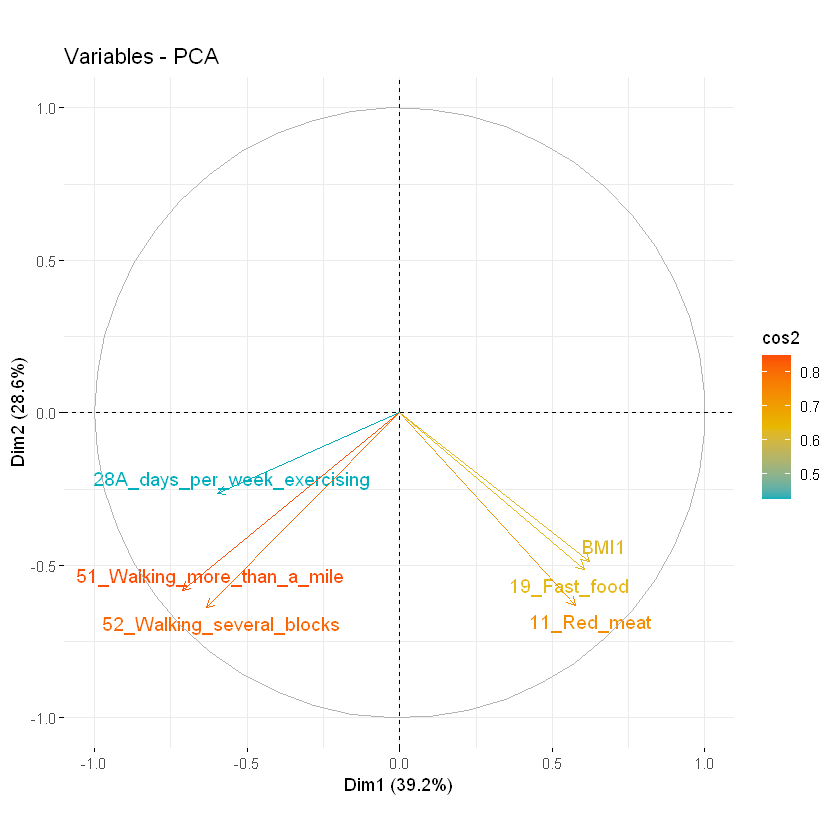

In [349]:
survey1_only <- merge(clean_base_1, cleaned_vitals1, by=0, all=TRUE)
survey1_only <- survey1_only[complete.cases(survey1_only), , drop = FALSE][-1]

survey1_only <- survey1_only[, !(names(survey1_only) %in% 
                                       c("Program.length"
                                       ))]

print("survey1")
summary(survey1_only)

library(factoextra)
res.pca <- prcomp(survey1_only, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

## End of Session Survey

[1] "survey2"


 28A_days_per_week_exercising 52_Walking_several_blocks
 Min.   :2.000                Min.   :1.000            
 1st Qu.:7.000                1st Qu.:3.000            
 Median :8.000                Median :3.000            
 Mean   :6.963                Mean   :2.741            
 3rd Qu.:8.000                3rd Qu.:3.000            
 Max.   :8.000                Max.   :3.000            
 51_Walking_more_than_a_mile  19_Fast_food       11_Red_meat       
 Min.   :1.000               Min.   :0.000000   Min.   :0.0000000  
 1st Qu.:3.000               1st Qu.:0.000000   1st Qu.:0.0000000  
 Median :3.000               Median :0.000000   Median :0.0000000  
 Mean   :2.716               Mean   :0.007114   Mean   :0.0004115  
 3rd Qu.:3.000               3rd Qu.:0.000000   3rd Qu.:0.0000000  
 Max.   :3.000               Max.   :0.333333   Max.   :0.0333333  
      BMI2      
 Min.   :18.32  
 1st Qu.:23.05  
 Median :25.97  
 Mean   :28.03  
 3rd Qu.:30.89  
 Max.   :70.77  

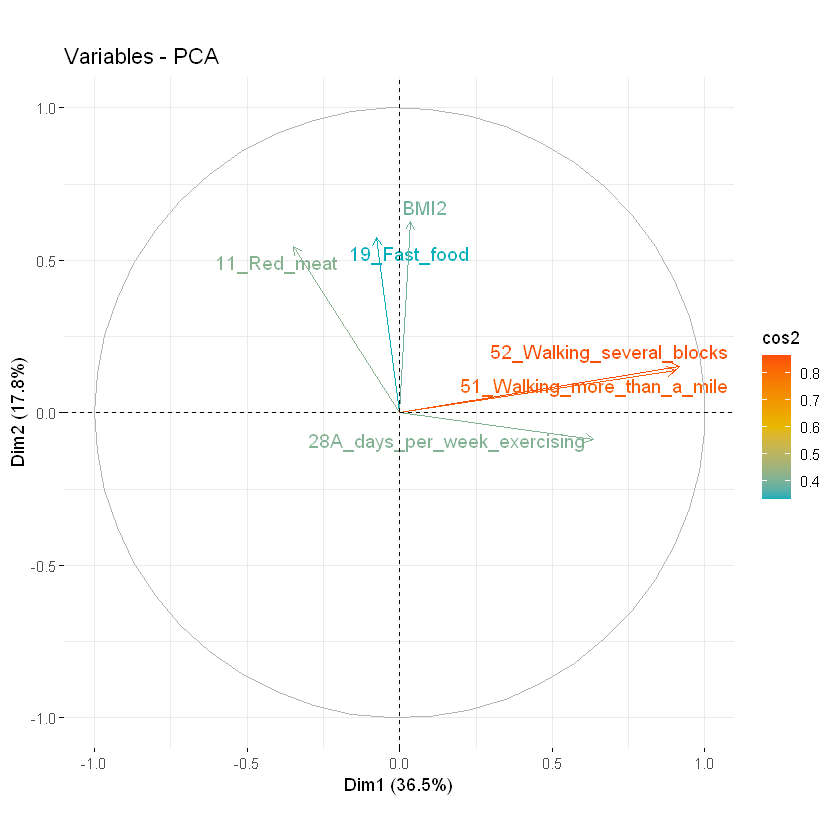

In [350]:
survey2_only <- merge(clean_base_2, cleaned_vitals2, by=0, all=TRUE)
survey2_only <- survey2_only[complete.cases(survey2_only), , drop = FALSE][-1]

survey2_only <- survey2_only[, !(names(survey2_only) %in% 
                                       c("Program.length"
                                       ))]


print("survey2")
summary(survey2_only)

res.pca <- prcomp(survey2_only, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

## Difference of baseline survey from end of session survey.

 28A_days_per_week_exercising 52_Walking_several_blocks
 Min.   :-4.000               Min.   :-2.000           
 1st Qu.: 2.000               1st Qu.: 0.000           
 Median : 5.000               Median : 0.000           
 Mean   : 4.291               Mean   : 0.443           
 3rd Qu.: 6.500               3rd Qu.: 1.000           
 Max.   : 8.000               Max.   : 2.000           
 51_Walking_more_than_a_mile  19_Fast_food       11_Red_meat      
 Min.   :-1.0000             Min.   :-0.57143   Min.   :-2.00000  
 1st Qu.: 0.0000             1st Qu.:-0.08333   1st Qu.:-0.06667  
 Median : 0.0000             Median : 0.00000   Median : 0.00000  
 Mean   : 0.5443             Mean   :-0.07902   Mean   :-0.10958  
 3rd Qu.: 1.0000             3rd Qu.: 0.00000   3rd Qu.: 0.00000  
 Max.   : 2.0000             Max.   : 0.14286   Max.   : 0.00000  
    BMI_diff      
 Min.   :-6.5228  
 1st Qu.:-1.2179  
 Median :-0.7037  
 Mean   :-0.9156  
 3rd Qu.:-0.4156  
 Max.   : 0.9007  

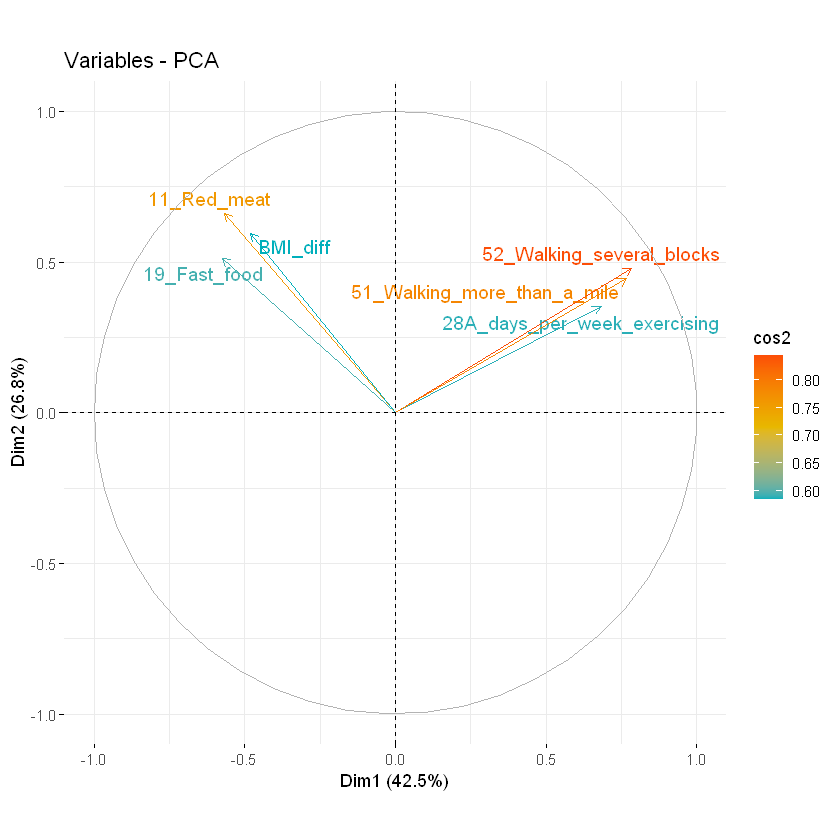

In [351]:
# The next couple lines merge the surveys and the vitals by ID.
final <- merge(surveys, cleaned_vitals, by=0, all=TRUE)
final_cleaned <- final[complete.cases(final), , drop = FALSE][-1]

final_cleaned <- final_cleaned[, !(names(final_cleaned) %in% 
                                       c("Program.length"
                                       ))]
summary(final_cleaned)

# PCA evaluation
library(factoextra)
res.pca <- prcomp(final_cleaned, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)